In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

plt.rcParams.update({"text.usetex": True, "font.family": "Computer Modern"})

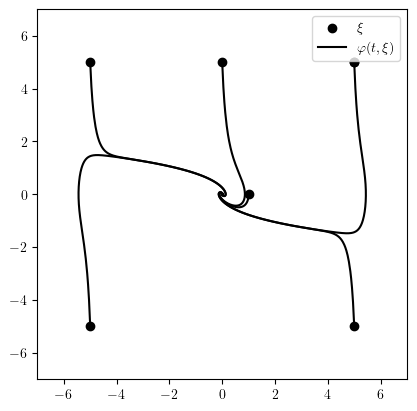

In [45]:
# set x and y range
x = np.linspace(-7, 7, 20)
y = np.linspace(-7, 7, 20)
X, Y = np.meshgrid(x, y)


# system 1
def pos(X, t):
    x = X[0]
    y = X[1]
    return np.array([y, -x + y - y**3])


# system 2
def neg(X, t):
    x = X[0]
    y = X[1]
    return np.array([y, -x - y - y**3])


# Change which system to plot here
func = neg
plt.xlim(-7, 7)
plt.ylim(-7, 7)
t = np.linspace(0, 100, int(1e4))
# Starting values
X0s = [[5, 5], [-5, 5], [-5, -5], [5, -5], [1, 0], [0, 5]]
for X0 in X0s:
    plt.scatter(X0[0], X0[1], c="black")
    phase = odeint(func, X0, t)
    plt.plot(phase[:, 0], phase[:, 1], c="black")
plt.scatter(5, 5, label="$\\xi$", c="black")
plt.plot(5, 5, label="$\\varphi(t, \\xi)$", c="black")


# Uncomment lines below to plot omega-set
# plt.plot([0,3,3,0,-3,-3,0],[5,0,-4,-5,0,4,5], c = "tab:blue")
# theta = np.linspace(0,np.pi *2)
# plt.plot(np.cos(theta),np.sin(theta),c = "tab:blue", label = "$\\partial \\mathcal{A}$")
plt.legend(loc=1)
plt.gca().set_aspect("equal", adjustable="box")
plt.savefig("figures/neg.pdf")
plt.show()

In [4]:
from sympy import symbols, simplify, solve, print_latex

# Finding expression for y' on line y=5-5x/3
x, y = symbols("x y")


def line(x):
    return 5 - 5 * x / 3


simplify(-x + line(x) - line(x) ** 3)

-8*x/3 + 125*(x - 3)**3/27 + 5

/tmp/ipykernel_6169/2718919084.py:4: RuntimeWarning: divide by zero encountered in divide
  return yp/xp


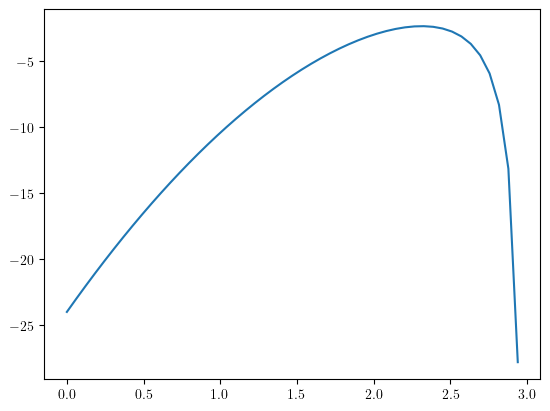

-2.332618984514028


In [31]:
# Function for calculating direction of solution on line y=5-5x/3
def dydx(x):
    xp = 5 - 5 * x / 3
    yp = -8 * x / 3 + 125 * (x - 3) ** 3 / 27 + 5
    return yp / xp


x = np.linspace(0, 3)
plt.plot(x, dydx(x))
plt.show()
# Print max, we want this to be < -5/3
print(np.max(dydx(x)))